## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
proportion=df['converted'].mean()*100
print('Proportion converted (%): '+str(proportion)+'%')

Proportion converted (%): 11.9659193556%


In [6]:
df.groupby('user_id')['converted'].mean().mean()

0.1195557910965504

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#treatment non-matching
treatment_non_matching=df.query('group=="treatment" & landing_page=="old_page"').shape[0]

#new_page non-matching
new_page_non_matching=df.query('landing_page=="new_page" & group=="control"').shape[0]

total_non_matching=treatment_non_matching+new_page_non_matching

print(total_non_matching)

3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
#all columns having the same row; no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
sub_1=df.query('group=="control" & landing_page=="old_page"')
sub_2=df.query('group=="treatment" & landing_page=="new_page"')
df2=sub_1.append(sub_2)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.value_counts()[df2.user_id.value_counts()!=1]

773192    2
Name: user_id, dtype: int64

In [14]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset='user_id',keep='first',inplace=True)

In [17]:
#confirmed only one row for user_id= 773192
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [18]:
# confirming no duplicated user_id
print('Number of duplicated user_id: '+str(sum(df2.user_id.duplicated())))

Number of duplicated user_id: 0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [23]:
df2['timestamp']=pd.to_datetime(df['timestamp'])
df2['timestamp'].max()-df2['timestamp'].min()

Timedelta('21 days 23:59:49.081927')

**Your answer goes here.**
The average conversion rate for both control and treatment group does not show any significant difference. Control group seems to have a higher conversion rate compared to the treatment group. Further testing needs to be done to determine if this difference is statistically significant.

From the timestamp, we can calculate that the test ran for around 22 days. As the test duration is relatively short, there is a chance that the results are affected from change aversion or novelty effect from the old and new users. Existing users might be experiencing change aversion as they prefer old version because they are unhappy with change while new users might be experiencing novelty effect whereby they are excited or drawn to change.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

**$$H_{0}: p_{old} - p_{new} \geq 0$$**

**$$H_{1}: p_{old} - p_{new} < 0 $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
#success rate equal for both p_new and p_old
p_new=df2.converted.mean()
print('p_new:',p_new)

p_new: 0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
#success rate equal for both p_new and p_old
p_old=df2.converted.mean()
print('p_old:',p_old)

p_old: 0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new=df2.query('group=="treatment"').user_id.nunique()
print('n_new:',n_new)

n_new: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old=df2.query('group=="control"').user_id.nunique()
print('n_old:',n_old)

n_old: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#np.random.binomial(n,p,size)
#n=1 trial size, p = probability of the trial, size=number of trial

In [29]:
new_page_converted=np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.12075562590324135

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.12055150956124289

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
print("p_new - p_old:", new_page_converted.mean() - old_page_converted.mean())

p_new - p_old: 0.000204116341998


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs=[]

for i in range(10000):
    #sample new_page
    new_page_converted=np.random.binomial(1,p_new,n_new)
    
    #sample old_page
    old_page_converted=np.random.binomial(1,p_old,n_old)
    
    #proportion of new_page converted
    sample_p_new=new_page_converted.mean()
    
    #proportion of old_page converted
    sample_p_old=old_page_converted.mean()
    
    #difference between the proportion of converted from new_page and old_page
    sample_diff=sample_p_new-sample_p_old
    
    #append to p_diffs
    p_diffs.append(sample_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

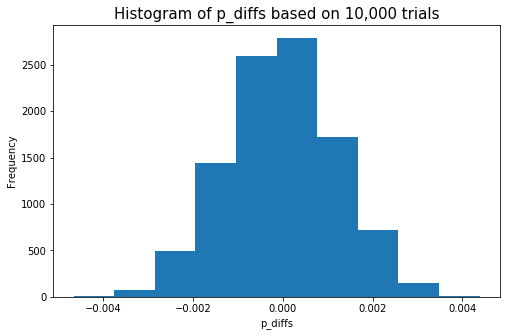

In [33]:
plt.figure(figsize=[8,5])
plt.hist(p_diffs)
plt.title('Histogram of p_diffs based on 10,000 trials', fontsize=15)
plt.xlabel('p_diffs', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

Yes, with large enough sample size, the sample distribution follows a normal distribution according to the **Central Limit Theorem**.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
obs_diff=df2.query('group=="treatment"').converted.mean()-df2.query('group=="control"').converted.mean()

In [35]:
print('Observed difference: '+str(obs_diff))

Observed difference: -0.00157823898536


In [36]:
print('Proportion of the p_diffs > obs_diff: '+str((p_diffs>obs_diff).mean()))

Proportion of the p_diffs > obs_diff: 0.8972


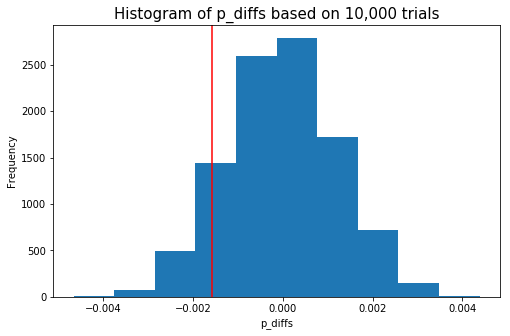

In [37]:
plt.figure(figsize=[8,5])
plt.hist(p_diffs)
plt.title('Histogram of p_diffs based on 10,000 trials', fontsize=15)
plt.xlabel('p_diffs', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.axvline(obs_diff,color='red')
plt.show()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**<br>
The proportion we calculated in part j is known as the p-value.
P-value is the probability that the null hypothesis for the hypothesis testing to be true.
If the p-value is low (lower than $\alpha$), null hypothesis is rejected and alternative hypothesis is true.
In our case, the p-value is high (0.9082), which suggest that we failed to reject the null hypothesis.
So it is better to just to keep the old page rather than using the new oage as there is no statistically significant difference in terms of conversion.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" and converted==1').shape[0]
convert_new = df2.query('group=="treatment" and converted==1').shape[0]
n_old = df2.query('group=="control"').shape[0]
n_new = df2.query('group=="treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
print('convert_old: {}'.format(convert_old))
print('convert_new: {}'.format(convert_new))
print('n_old: {}'.format(n_old))
print('n_new: {}'.format(n_new))

convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
#sm.stats.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
#Alternative hypothesis: p_old < p_new
z_score,p_value=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],value=None, alternative='smaller',
                                                    prop_var=False)
print('z_score: {}'.format(z_score))
print('p_value: {}'.format(p_value))

z_score: 1.3109241984234394
p_value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**<br>
The Z score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis.
Z scores are measures of standard deviation from the mean of a standard normal distribution.
Critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations.
The z_score we have calculated from the Z-test is 1.31 within -1.96 and +1.96. Hence, we failed to reject the null hypothesis. <br>
The p_value calculated from the Z-test is 0.905; which is around the same value from our earlier calculation. This reinforced our conclusion of failing to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**<br>
Logistic regression will be used for this case because we are trying to predict categorical data with only 2 outcomes (0 and 1); predicting whether a user will convert or not depending on their landing page.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
#adding intercept column
df2['intercept']=1

In [42]:
df2[['control','ab_page']]=pd.get_dummies(df2.group)
df2[['new_page','old_page']]=pd.get_dummies(df2.landing_page)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
#code to fix the error problem
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#logistic model fitted with intercept and ab_page column
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        02:20:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**<br>

In regression, the p-values are given for testing if the parameter for the intercept of the slope are equal to zero in the null hypothesis.<br>

**$$H_{0}: \beta_{1} = 0 $$**
**$$H_{1}: \beta_{1} \neq 0$$**
<br>

In **Part III** the P-values calculated is for a **two-tailed test** with the hypothesis below. <br>
**$$H_{0}: ab\_page = 0 $$**
**$$H_{1}: ab\_page \neq 0$$**
<br>
The P-value for ab_page is 0.190 which is greater than the $\alpha$; assuming the $\alpha$ value is 0.05. Hence, we fail to reject the null hypothesis. There is no statistical significant difference between the performance of the new and old landing page.The P-value here is different from the P-value in **Part II** because in **Part II** we are performing a A/B test where our null hypothesis is that the old page is better than or equal to the new page(**one-tailed test**).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**<br>
It is a good idea to include more factors into the regression model because new variables might help in better refining the model. However, by adding more variables, multicollinearity might occur where these variables are correlated with one another causing flipped regression coefficient and inaccurate hypothesis test. However, this can be fix by removing these variables by identifying them through scatterplot matrix or VIFs test. <br>
<br>
Higher order terms can also be added to improve the regression model to fit better with the data, however this will complicate the interpretation process of the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
#import the countries.csv
df_countries=pd.read_csv('countries.csv')

In [47]:
# check the df
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
#test if there is any duplicated user_id
print('Number of duplicated user_id: {}'.format(sum(df_countries['user_id'].duplicated())))

Number of duplicated user_id: 0


In [49]:
#merging df2 with df_countries
df_merged=pd.merge(df2,df_countries, on='user_id')

In [50]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,0,1,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,0,1,US


In [51]:
#create dummy variables for country
df_merged[['CA','UK','US']]=pd.get_dummies(df_merged.country)

In [52]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,0,1,US,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,0,1,US,0,0,1


In [53]:
# using US as the baseline
logit_model=sm.Logit(df_merged.converted,df_merged[['intercept','CA','UK']])
results=logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        02:20:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Answer:**<br>
Assumption: $\alpha$ is 0.05 <br>
Both CA and UK have P-values greater than $\alpha$; 0.129 and 0.456 respectively. Hence we fail to reject the null hypothesis and conclude that countries does not affect the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
df_merged['ab_CA']=df_merged['ab_page']*df_merged['CA']
df_merged['ab_UK']=df_merged['ab_page']*df_merged['UK']

In [58]:
# using US as the baseline
logit_model2=sm.Logit(df_merged.converted,df_merged[['intercept','ab_page','ab_CA','ab_UK']])
results2=logit_model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:               3.351e-05
Time:                        02:53:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
ab_CA         -0.0644      0.038     -1.679      0.093      -0.140       0.011
ab_UK          0.0257      0.019      1.363      0.173      -0.011       0.063
==============================================================================
"""

**Answer:**<br>
Assumption: $\alpha$ is 0.05 <br>
By adding ab_UK and ab_CA into the regression model does not change the result. P-values for ab_page, ab_CA and ab_UK remains to be higher than $\alpha$. Hence, we fail to reject the null hypothesis.  <br>
<br>

### Conclusion:
After performing the study through probability calculation, A/B Testing and Regression modelling, we conclude that there is no statistical evidence to support changing to the new landing page. For this reason, I would recommend staying with the old landing page until we have enough evidence to suggest otherwise.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0